(stereographic-subsetting-page)=
# Subsetting ARCO Data with Original-grid

The "plate carrée" projection (equirectangular projection centered on the Equator) is widely used. It uses simply x=longitude and y=latitude on a map. However, for regions near the poles - such as the Arctic and Antarctic - alternative coordinate systems, including the stereographic projection, are often employed. The specific projection applied to each dataset is detailed in the respective product documentation, available through the [Copernicus Marine Data Store](https://data.marine.copernicus.eu/products) (**e.g.** [this product description](https://data.marine.copernicus.eu/product/ARCTIC_ANALYSISFORECAST_PHY_002_001/description)).

Maintaining data in the Original-grid format, rather than only providing longitude and latitude coordinates, offers significant benefits:
- It preserves the dataset's original structure and integrity
- It facilitates direct use of the Original-grid coordinates for relevant applications

We present in this notebook how to subset those data using the Copernicus Marine Toolbox.

## Original-grid Coordinate System

### Different Coordinate Systems Have Different Bounding Options

Most datasets use a longitude/latitude projection system. For area subsetting, the standard parameters are `minimum_longitude`, `maximum_longitude`, `minimum_latitude` and `maximum_latitude`.

When working with the Original-grid coordinate system, the subsetting parameters differ:
- For the x-axis: `minimum_x` (or `--minimum-x`) and  `maximum_x` (or `--maximum-x`).
- For the y-axis: `minimum_y` (or `--minimum-y`) and `maximum_y` (or `--maximum-y`). 

These parameters enable subsetting operations based on the Original-grid projection coordinates.

### Different Coordinate Systems Belong to Different Parts

For a given dataset and version, the data in stereographic projection is in a different part.

Consequently, when downloading data in their Original-grid, you must explicitly specify the dataset part:

- Command-line interface: Use ``--dataset-part originalGrid``
- Python interface: Specify ``dataset_part="originalGrid"``

If missing, the toolbox will automatically return the default geographical coordinate system, in (longitude, latitude) projection.

## Python Interface and Plot Comparison

To demonstrate the data retrieval process, we provide an example comparing plots of similar regions using the toolbox. We first illustrate how to download datasets in geographical coordinates, followed by the Original-grid projection method.

### With Longitude/Latitude
This established toolbox option retrieves an Arctic region as follows:

In [1]:
import copernicusmarine as cmt
dataset_lonlat = cmt.open_dataset(
    dataset_id="cmems_mod_arc_bgc_my_ecosmo_P1D-m", 
    variables=["chl", "zooc", "o2"], 
    minimum_latitude=64.99684, 
    maximum_latitude=90, 
    minimum_longitude=-180, 
    maximum_longitude=180,
)
dataset_lonlat

INFO - 2025-03-20T09:02:26Z - Selected dataset version: "202105"
INFO - 2025-03-20T09:02:26Z - Selected dataset part: "default"


<xarray.Dataset>
Dimensions:    (time: 5844, depth: 1, latitude: 101, longitude: 1440)
Coordinates:
  * depth      (depth) float32 3.0
  * latitude   (latitude) float64 65.0 65.25 65.5 65.75 ... 89.5 89.75 90.0
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time       (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2022-12-31
Data variables:
    chl        (time, depth, latitude, longitude) float32 dask.array<chunksize=(3066, 1, 10, 1440), meta=np.ndarray>
    zooc       (time, depth, latitude, longitude) float32 dask.array<chunksize=(3066, 1, 10, 1440), meta=np.ndarray>
    o2         (time, depth, latitude, longitude) float32 dask.array<chunksize=(3066, 1, 10, 1440), meta=np.ndarray>
Attributes:
    source:       NERSC-HYCOM model fields
    references:   http://topaz.nersc.no
    institution:  NERSC, Jahnebakken 3, 5006 Bergen, Norway
    title:        Arctic Ocean Biogeochemistry Reanalysis, 25km surface daily...
    Conventions:  CF-1.4
    history:      Created by program hyc2proj, version V0.3

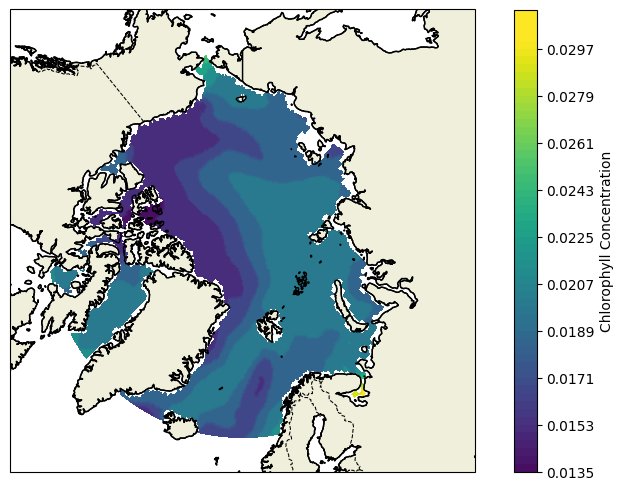

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select chlorophyll data for the specific date
chl = dataset_lonlat.sel(time="2021-01-01").chl.squeeze() # Single time-point selection

# Create figure and axis with North Polar projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.NorthPolarStereo()})

#Configure map extent and features
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=0.75)
ax.add_feature(cfeature.LAND, edgecolor="black")

# Generate chlorophyll concentration plot
contour = ax.contourf(chl.longitude, chl.latitude, chl, levels=60, cmap='viridis', transform = ccrs.PlateCarree(), vmin=0.0130, vmax=0.03)

# Add and format colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', fraction=0.046, pad=0.05)
cbar.set_label("Chlorophyll Concentration")


# Show the plot
plt.show()


### With Stereographic Projection

- Spatial boundaries are defined onto the stereographic grid (``minimum_x``, ``maximum_x``, ``minimum_y``, ``maximum_y``) rather than the geographical one (``minimum_longitude``, ``minimum_latitude``, etc.)
- The dataset part must be explicitly specified as ``"originalGrid"`` (as previously documented)

The data retrieval with Original-grid projection is performed as follows:

In [6]:
import copernicusmarine as cmt
# We filter the dask errors and warnings
import dask
import warnings
# Disable dask warnings by specifying 'error' as its level of logging
dask.config.set({'logging.distributed': 'error'})
# Disable all other warnings
warnings.filterwarnings("ignore")
dataset_stereographic = cmt.open_dataset(
    dataset_id="cmems_mod_arc_bgc_my_ecosmo_P1D-m", 
    variables=["chl", "zooc", "o2"], 
    minimum_y=-20, 
    maximum_y=20, 
    minimum_x=-20, 
    maximum_x=20,
    dataset_part="originalGrid"
)
dataset_stereographic

INFO - 2025-03-31T12:38:52Z - Selected dataset version: "202105"
INFO - 2025-03-31T12:38:52Z - Selected dataset part: "originalGrid"


<xarray.Dataset> Size: 3GB
Dimensions:    (time: 5844, depth: 1, y: 161, x: 161)
Coordinates:
  * depth      (depth) float32 4B 3.0
    latitude   (y, x) float32 104kB dask.array<chunksize=(84, 64), meta=np.ndarray>
    longitude  (y, x) float32 104kB dask.array<chunksize=(84, 64), meta=np.ndarray>
  * time       (time) datetime64[ns] 47kB 2007-01-01 2007-01-02 ... 2022-12-31
  * x          (x) float32 644B -20.0 -19.75 -19.5 -19.25 ... 19.5 19.75 20.0
  * y          (y) float32 644B -20.0 -19.75 -19.5 -19.25 ... 19.5 19.75 20.0
Data variables:
    chl        (time, depth, y, x) float64 1GB dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
    zooc       (time, depth, y, x) float64 1GB dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
    o2         (time, depth, y, x) float32 606MB dask.array<chunksize=(5844, 1, 84, 64), meta=np.ndarray>
Attributes:
    references:   http://topaz.nersc.no
    source:       NERSC-HYCOM model fields
    institution:  NERSC, Jahnebakken 3, 5006 Bergen, Norway
    title:        Arctic Ocean Biogeochemistry Reanalysis, 25km surface daily...
    Conventions:  CF-1.4
    history:      Created by program hyc2proj, version V0.3

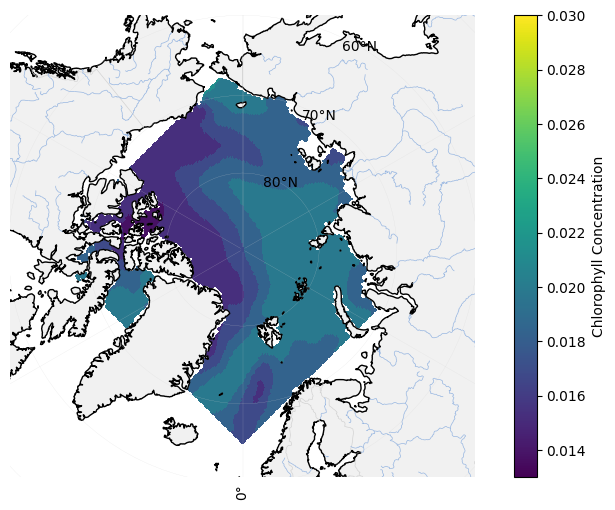

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select chlorophyll data for the specific date
chl = dataset_lonlat.sel(time="2021-01-01").chl.squeeze() # Single time-point selection

fig = plt.figure(figsize=(10,6), dpi=100)
fig.patch.set_visible(True)
fig.set_facecolor("white")

# Create an "ax" from which we add the projection
ax = plt.axes(projection=ccrs.NorthPolarStereo())


gl2 = ax.gridlines(draw_labels=True, color = 'lightgray', linewidth=0.1)
gl2.right_labels = False
gl2.top_labels = False
ax.axis('off')

ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

# Generate chlorophyll concentration plot
contour = ax.pcolormesh(chl.x*100000, chl.y*100000, chl, cmap='viridis', transform=ccrs.NorthPolarStereo(-45), vmin=0.0130, vmax=0.03)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="lightgray")
ax.add_feature(cfeature.RIVERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, linewidth=0.5, facecolor='#f1f1f1', edgecolor='lightgray', zorder=1)

# Add and format colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', fraction=0.046, pad=0.05)
cbar.set_label("Chlorophyll Concentration")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
# Show the plot
plt.show()

## CLI Options, Shortcuts and Behaviour

As with all toolbox functionality, you may alternatively use the command-line interface (CLI) to retrieve data in Original-grid projections. This requires careful specification of both the correct coordinate bounds option and the correct dataset part.

### Dataset Part and Coordinate Arguments

**Standard Geographic Coordinates (Longitude/Latitude):**

When working with conventional latitude/longitude projections, you specify the area using degree-based boundaries:

```bash
copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -o cmems_mod_arc_bgc_my_ecosmo_P1D-m_subset -v chl -v zooc -v o2 --minimum-latitude 60 --maximum-latitude 85 --minimum-longitude -180 --maximum-longitude 180 --dry-run
```

**Original-Grid Projection Requirements:**

For stereographic or other Original-grid projections, you must:

- Explicitly declare ``--dataset-part originalGrid``
- Use projected coordinates (e.g., `--maximum-x`) instead of geographic coordinates
- Ensure coordinate values are within the dataset value range

```bash
copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 --minimum-y -5 --maximum-y 5 --minimum-x -10 --maximum-x 10 --dry-run --dataset-part originalGrid
```

### Shortcuts and units

The toolbox provides abbreviated flags for coordinate specification:

**Original-Grid Projection (Length Units):**

When using ``--dataset-part originalGrid``, the shortcuts -x/-X (x-axis) and -y/-Y (y-axis) are interpreted as length units (meters or kilometers depending on dataset):

```bash
copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 -y -5 -Y 5 -x -10 -X 10 --dry-run --dataset-part originalGrid
```

**Geographic Coordinates (Degrees):**

Without the originalGrid part specification, the same shortcuts default to degree units:

```bash
copernicusmarine subset -i cmems_mod_arc_bgc_my_ecosmo_P1D-m -v chl -v zooc -v o2 -y 65 -Y 85 -x -180 -X 180 --dry-run
```

### Critical Unit Considerations

Original-grid datasets exhibit important unit variations:

1. **Unit Discrepancies:**
- Some datasets use meters (e.g., bounds like -5,500,000 to 5,500,000)
- Others use 100km units (e.g., bounds like -28 to 43)
2. **Verification Methods:**
- Check the ``coordinates_extent`` in subset responses
- Use the ``describe`` command to inspect metadata before subsetting

Check the output of the response with the `subset`:

```bash
copernicusmarine subset -i cmems_mod_arc_phy_my_hflux_P1M-m -y 25000 -Y 850000 -x -10000 -X 1800000 --dry-run --dataset-part originalGrid 
```

Comprehensive Dataset Inspection:

```bash
copernicusmarine describe -i cmems_mod_arc_phy_my_hflux_P1M-m -r coordinates,label,name,service_name -e values
```

*Note: Always verify the correct dataset part (typically the second part for Original-grid data) when using describe.*

## List of datasets that have Original-grid projection

Datasets with "originalGrid" part:
- ``cmems_mod_arc_bgc_anfc_ecosmo_P1D-m``
- ``cmems_mod_arc_bgc_anfc_ecosmo_P1M-m``
- ``cmems_mod_arc_phy_anfc_6km_detided_PT1H-i``
- ``cmems_mod_arc_phy_anfc_6km_detided_PT6H-m``
- ``cmems_mod_arc_phy_anfc_6km_detided_P1D-m``
- ``cmems_mod_arc_phy_anfc_6km_detided_P1M-m``
- ``cmems_mod_arc_bgc_my_ecosmo_P1D-m``
- ``cmems_mod_arc_bgc_my_ecosmo_P1M``
- ``cmems_mod_arc_bgc_my_ecosmo_P1Y``
- ``cmems_mod_arc_phy_my_topaz4_P1D-m``
- ``cmems_mod_arc_phy_my_topaz4_P1M``
- ``cmems_mod_arc_phy_my_topaz4_P1Y``
- ``cmems_mod_arc_phy_my_hflux_P1D-m``
- ``cmems_mod_arc_phy_my_hflux_P1M-m``
- ``cmems_mod_arc_phy_my_mflux_P1D-m"``
- ``cmems_mod_arc_phy_my_mflux_P1M-m``
- ``cmems_mod_arc_phy_my_nextsim_P1M-m``
- ``DMI-ARC-SEAICE_BERG_MOSAIC-L4-NRT-OBS``
- ``DMI-ARC-SEAICE_BERG_MOSAIC_IW-L4-NRT-OBS``
- ``cmems_obs-wind_arc_phy_my_l3-s1a-sar-asc-0.01deg_P1D-i``
- ``cmems_obs-wind_arc_phy_my_l3-s1a-sar-desc-0.01deg_P1D-i``
- ``cmems_obs-si_arc_physic_nrt_1km-grl_P1D-irr``
- ``DMI-ARC-SEAICE_BERG_IW-L4-NRT-OBS``
- ``DMI-ARC-SEAICE_BERG-L4-NRT-OBS``
- ``cmems_obs-si_arc_physic_nrt_1km-grl_P1WT3D-m``
- ``cmems_obs-si_arc_phy_nrt_1km-svb_P1D-irr``
- ``cmems_mod_arc_phy_my_nextsim_P1D-m``
- ``cmems_mod_arc_phy_anfc_nextsim_hm``
- ``cmems_mod_arc_phy_anfc_nextsim_P1M-m``